In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

Libraries imported successfully!


In [ ]:
df = pd.read_csv('../data/processed/all_kaggle_data.csv', low_memory=False)
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")

Dataset loaded!
Shape: 5941 rows x 136 columns

This means we have 5,941 player records with 136 different statistics.


In [ ]:
df.head()

First 5 rows of our dataset:


,unnamed_0,name,season,season_year,team,rating,goals,bigchancescreated,bigchancesmissed,assists,goalsassistssum,accuratepasses,inaccuratepasses,totalpasses,accuratepassespercentage,accurateownhalfpasses,accurateoppositionhalfpasses,accuratefinalthirdpasses,keypasses,successfuldribbles,successfuldribblespercentage,tackles,interceptions,yellowcards,directredcards,...,squad,mp,w,d,l,gf,ga,gd,pts,xg,xga,xgd,xgd90,last_5,attendance,top_team_scorer,goalkeeper,country,serial,player_name,club,position,corner_taken,dribbles,match_played
0,0.0,Robin van Persie,Champions League 13/14,13/14,manchester-united,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Ashley Cole,Champions League 13/14,13/14,chelsea,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,José Antonio Reyes,UEFA Champions League 15/16,15/16,sevilla,7.25,0.0,0.0,1.0,0.0,0.0,58.0,26.0,84.0,69.047619,18.0,42.0,27.0,2.0,1.0,50.0,1.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Roman Weidenfeller,Champions League 13/14,13/14,borussia-dortmund,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Roman Weidenfeller,Champions League 14/15,14/15,borussia-dortmund,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print(f"All {len(df.columns)} columns in our dataset:")
print("\n".join(df.columns.tolist()))

All 136 columns in our dataset:
unnamed_0
name
season
season_year
team
rating
goals
bigchancescreated
bigchancesmissed
assists
goalsassistssum
accuratepasses
inaccuratepasses
totalpasses
accuratepassespercentage
accurateownhalfpasses
accurateoppositionhalfpasses
accuratefinalthirdpasses
keypasses
successfuldribbles
successfuldribblespercentage
tackles
interceptions
yellowcards
directredcards
redcards
accuratecrosses
accuratecrossespercentage
totalshots
shotsontarget
shotsofftarget
groundduelswon
groundduelswonpercentage
aerialduelswon
aerialduelswonpercentage
totalduelswon
totalduelswonpercentage
minutesplayed
goalconversionpercentage
penaltiestaken
penaltygoals
penaltywon
penaltyconceded
shotfromsetpiece
freekickgoal
goalsfrominsidethebox
goalsfromoutsidethebox
shotsfrominsidethebox
shotsfromoutsidethebox
headedgoals
leftfootgoals
rightfootgoals
accuratelongballs
accuratelongballspercentage
clearances
errorleadtogoal
errorleadtoshot
dispossessed
possessionlost
possessionwonattthird
to

In [ ]:
print(df.dtypes.value_counts())
print(df.select_dtypes(include='object').columns.tolist())

Data types of each column:
float64    123
object      13
Name: count, dtype: int64


Columns with 'object' type (text):
['name', 'season', 'season_year', 'team', 'rk', 'squad', 'last_5', 'top_team_scorer', 'goalkeeper', 'country', 'player_name', 'club', 'position']


In [ ]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values
})

missing_summary = missing_summary.sort_values('Missing_Percent', ascending=False)

print(missing_summary.head(20))

Columns with the most missing data:
              Column  Missing_Count  Missing_Percent
120               xg           5909         99.46137
128          country           5909         99.46137
126  top_team_scorer           5909         99.46137
121              xga           5909         99.46137
125       attendance           5909         99.46137
124           last_5           5909         99.46137
123            xgd90           5909         99.46137
122              xgd           5909         99.46137
109               sn           5909         99.46137
110               rk           5909         99.46137
111            squad           5909         99.46137
112               mp           5909         99.46137
113                w           5909         99.46137
114                d           5909         99.46137
115                l           5909         99.46137
116               gf           5909         99.46137
117               ga           5909         99.46137
118       

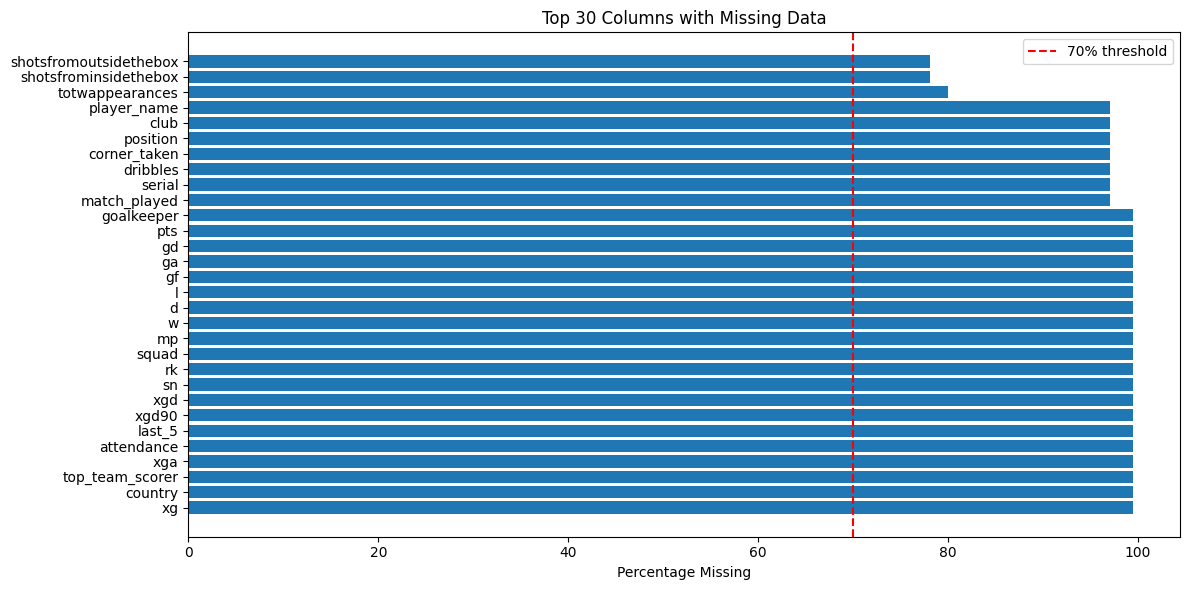


Columns with >70% missing: 32


In [20]:
plt.figure(figsize=(12, 6))
top_missing = missing_summary.head(30)
plt.barh(top_missing['Column'], top_missing['Missing_Percent'])
plt.xlabel('Percentage Missing')
plt.title('Top 30 Columns with Missing Data')
plt.axvline(x=70, color='red', linestyle='--', label='70% threshold')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nColumns with >70% missing: {len(missing_summary[missing_summary['Missing_Percent'] > 70])}")

In [ ]:
key_stats = ['goals', 'assists', 'rating', 'minutesplayed', 'totalshots', 
             'shotsontarget', 'keypasses', 'successfuldribbles']

existing_stats = [stat for stat in key_stats if stat in df.columns]

print("Summary statistics for key offensive metrics:")
df[existing_stats].describe()

Summary statistics for key offensive metrics:


,goals,assists,rating,minutesplayed,totalshots,shotsontarget,keypasses,successfuldribbles
count,5733.000000,5811.000000,4069.000000,5733.000000,4069.000000,4069.000000,4069.000000,4069.000000
mean,0.504622,0.360351,6.724582,323.625676,3.293438,1.563529,3.273532,3.462767
std,1.207323,0.785127,0.896538,251.248743,5.087331,2.883975,4.670315,5.331204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.575000,109.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,6.800000,270.000000,2.000000,0.000000,2.000000,2.000000
75%,1.000000,0.000000,7.033333,490.000000,4.000000,2.000000,4.000000,5.000000
max,17.000000,8.000000,9.700000,1230.000000,69.000000,39.000000,37.000000,57.000000


In [ ]:
print("Seasons in our dataset:")
season_counts = df['season_year'].value_counts().sort_index()
print(season_counts)

print(f"Date range: {season_counts.index.min()} to {season_counts.index.max()}")

Seasons in our dataset:
season_year
13/14    808
14/15    856
15/16    676
16/17    698
17/18    693
18/19    702
19/20    685
20/21    615
Name: count, dtype: int64

We have data for 8 different seasons.
Date range: 13/14 to 20/21


In [23]:
top_scorers = df[['name', 'season_year', 'team', 'goals', 'assists', 'rating', 'minutesplayed']].copy()

top_scorers = top_scorers.dropna(subset=['goals'])

top_scorers = top_scorers.sort_values('goals', ascending=False)

print("Top 20 individual performances by goals:")
top_scorers.head(20)

Top 20 individual performances by goals:


,name,season_year,team,goals,assists,rating,minutesplayed
72,Cristiano Ronaldo,13/14,juventus,17.0,2.0,NaN,993.0
74,Cristiano Ronaldo,15/16,juventus,16.0,4.0,8.116667,1109.0
2072,Robert Lewandowski,19/20,bayern-munchen,15.0,5.0,8.350000,887.0
76,Cristiano Ronaldo,17/18,juventus,15.0,3.0,8.092308,1170.0
75,Cristiano Ronaldo,16/17,juventus,12.0,5.0,7.846154,1200.0
701,Lionel Messi,18/19,barcelona,12.0,3.0,8.900000,837.0
699,Lionel Messi,16/17,barcelona,11.0,2.0,8.233333,810.0
3471,Neymar,14/15,paris-saint-germain,10.0,0.0,NaN,1026.0
73,Cristiano Ronaldo,14/15,juventus,10.0,3.0,NaN,1065.0
4228,Sadio Mané,17/18,liverpool,10.0,1.0,7.781818,940.0


In [ ]:
pott_winners = {
    '13/14': 'Cristiano Ronaldo',
    '14/15': 'Lionel Messi',
    '15/16': 'Cristiano Ronaldo',
    '16/17': 'Cristiano Ronaldo',
    '17/18': 'Luka Modrić',
    '18/19': 'Virgil van Dijk',
    '19/20': 'Robert Lewandowski',
    '20/21': 'Jorginho',
    '21/22': 'Karim Benzema',
    '22/23': 'Erling Haaland',
    '23/24': 'Vinicius Junior',
    '24/25': 'Ousmane Dembélé',
}

print("UEFA Champions League Player of the Year Winners:")
for season, player in pott_winners.items():
    print(f"{season}: {player}")

UEFA Champions League Player of the Year Winners:
13/14: Cristiano Ronaldo
14/15: Lionel Messi
15/16: Cristiano Ronaldo
16/17: Cristiano Ronaldo
17/18: Luka Modrić
18/19: Virgil van Dijk
19/20: Robert Lewandowski
20/21: Jorginho
21/22: Karim Benzema
22/23: Erling Haaland
23/24: Vinicius Junior
24/25: Ousmane Dembélé

Current Season: 25/26 (ONGOING - This is what we want to predict!)


In [ ]:
for season, winner in pott_winners.items():
    matches = df[(df['season_year'] == season) & (df['name'].str.contains(winner, case=False, na=False))]
    
    if len(matches) > 0:
        print(f"✓ {season} - {winner}: FOUND ({len(matches)} record(s))")
        if 'goals' in matches.columns and 'assists' in matches.columns:
            goals = matches['goals'].iloc[0]
            assists = matches['assists'].iloc[0]
            print(f"  Stats: {goals} goals, {assists} assists\n")
    else:
        print(f"✗ {season} - {winner}: NOT FOUND\n")

Checking if winners are in our dataset...

✓ 13/14 - Cristiano Ronaldo: FOUND (1 record(s))
  Stats: 17.0 goals, 2.0 assists

✓ 14/15 - Lionel Messi: FOUND (1 record(s))
  Stats: 10.0 goals, 5.0 assists

✓ 15/16 - Cristiano Ronaldo: FOUND (1 record(s))
  Stats: 16.0 goals, 4.0 assists

✓ 16/17 - Cristiano Ronaldo: FOUND (1 record(s))
  Stats: 12.0 goals, 5.0 assists

✓ 17/18 - Luka Modrić: FOUND (1 record(s))
  Stats: 1.0 goals, 1.0 assists

✓ 18/19 - Virgil van Dijk: FOUND (1 record(s))
  Stats: 2.0 goals, 2.0 assists

✓ 19/20 - Robert Lewandowski: FOUND (1 record(s))
  Stats: 15.0 goals, 5.0 assists

✓ 20/21 - Jorginho: FOUND (1 record(s))
  Stats: 0.0 goals, 0.0 assists

✗ 21/22 - Karim Benzema: NOT FOUND

✗ 22/23 - Erling Haaland: NOT FOUND

✗ 23/24 - Vinicius Junior: NOT FOUND

✗ 24/25 - Ousmane Dembélé: NOT FOUND

